# 准备环境

In [ ]:
# 已在第一次作业时配好

In [1]:
import os
os.chdir('mmdetection')

In [11]:
# 检查环境
from mmengine.utils import get_git_hash
from mmengine.utils.dl_utils import collect_env as collect_base_env
import mmdet
def collect_env():
    env_info = collect_base_env()
    env_info['MMDetection']=f'{mmdet.__version__}+{get_git_hash()[:7]}'
    return env_info

In [12]:
for name,val in collect_env().items():
    print(f'{name}:{val}')

sys.platform:linux
Python:3.8.10 (default, Jun  4 2021, 15:09:15) [GCC 7.5.0]
CUDA available:True
numpy_random_seed:1956079035
GPU 0:NVIDIA GeForce RTX 3090
CUDA_HOME:/usr/local/cuda
NVCC:Cuda compilation tools, release 11.1, V11.1.105
GCC:gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch:1.9.0+cu111
PyTorch compiling details:PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=compute_86,code=sm_86
  - CuDNN 8.0.5
  - Magma 2.5

# 准备数据集

In [ ]:
# 解压数据集
# unzip balloon_dataset.zip
# rm -rf __MACOSX

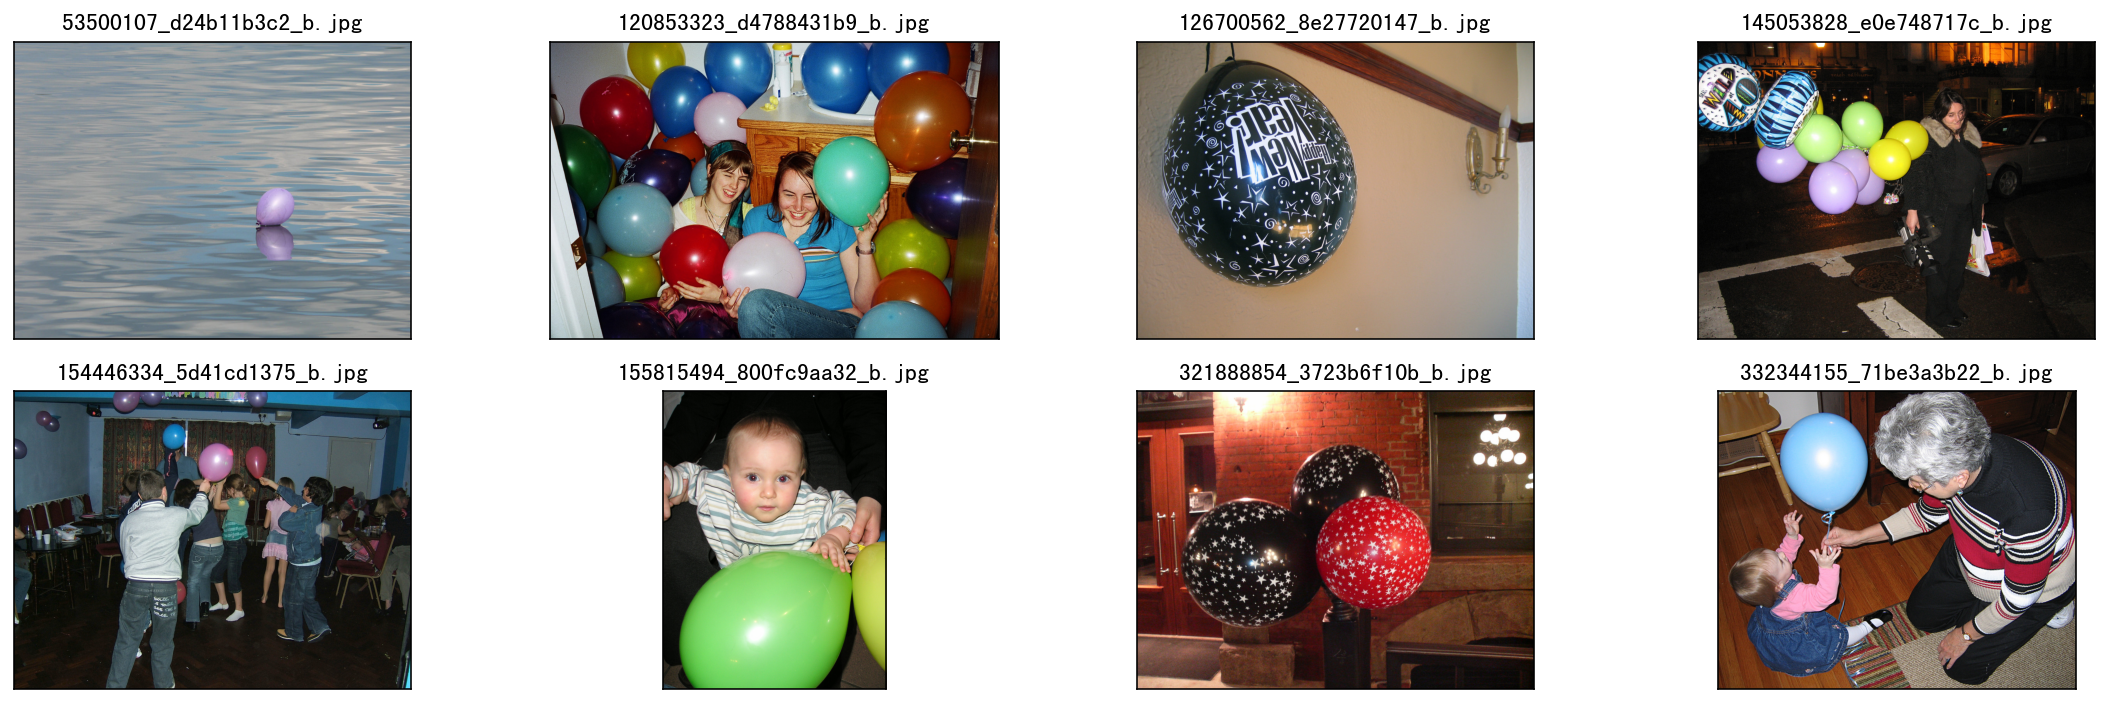

In [2]:
# 数据集可视化
import os
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

data_path = '/root/autodl-tmp/MMDet/balloon/train'
original_images = []
images = []
texts = []
plt.figure(figsize=(16, 5))

image_paths= [filename for filename in os.listdir(data_path) if not filename.endswith('json')][:8]


for i,filename in enumerate(image_paths):
    name = os.path.splitext(filename)[0]
    image = Image.open(data_path+'/'+filename).convert("RGB")
  
    plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.title(f"{filename}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

In [3]:
# 参照教程代码将训练集转为COCO格式
import json
import re
from collections import defaultdict
import cv2
import os

# 读取JSON文件
with open('/root/autodl-tmp/MMDet/balloon/train/via_region_data.json') as f:
    annotations = json.load(f)

# 初始化COCO格式字典
coco_dict = defaultdict(list)
coco_dict['info'] = {}
coco_dict['licenses'] = []
coco_dict['categories'] = []
coco_dict['images'] = []
coco_dict['annotations'] = []

# 添加info信息
coco_dict['info']['version'] = '1.0'
coco_dict['info']['description'] = 'Balloon Dataset'
coco_dict['info']['year'] = 2023
coco_dict['info']['contributor'] = 'YUJUNYU'
coco_dict['info']['date_created'] = '2023-06-09'

# 添加categories信息
category_id = 1
category = {'id': category_id, 'name': 'balloon', 'supercategory': 'object'}
coco_dict['categories'].append(category)

# 遍历每个图像的注释信息
annotation_id = 1
for image_id, image_info in annotations.items():
    # 从image_id中提取出正确的图像ID
    match = re.search(r'(\d+)_.*', image_id)
    if match:
        image_id = match.group(1)
    else:
        continue
    
    # 获取图像的文件名和大小
    filename = image_info['filename']
    size = image_info['size']
    # 获取图像的height和width
    img = cv2.imread(os.path.join('/root/autodl-tmp/MMDet/balloon/train/', filename))
    height, width, _ = img.shape
    # print(filename,height,width)
    
    # 添加图像信息
    image = {'id': int(image_id), 'file_name': filename, 'width': width, 'height': height}
    coco_dict['images'].append(image)
    
    # 获取多边形注释信息
    regions = image_info['regions']
    for region_id, region_info in regions.items():
        # 获取多边形顶点坐标
        x = region_info['shape_attributes']['all_points_x']
        y = region_info['shape_attributes']['all_points_y']
        points = list(zip(x, y))
        
        # 计算多边形的边界框
        xmin = min(x)
        xmax = max(x)
        ymin = min(y)
        ymax = max(y)
        width = xmax - xmin
        height = ymax - ymin
        
        # 添加注释信息
        annotation = {'id': annotation_id, 'image_id': int(image_id), 'category_id': category_id, 'segmentation': [points], 'area': width * height, 'bbox': [xmin, ymin, width, height], 'iscrowd': 0}
        coco_dict['annotations'].append(annotation)
        annotation_id += 1

# 保存COCO格式文件
with open('/root/autodl-tmp/MMDet/balloon/train/balloon_train.json', 'w') as f:
    json.dump(coco_dict, f)

print('success！')

In [ ]:
# 参照教程将测试集合转化为COCO格式
import json
import re
from collections import defaultdict
import cv2

# 读取JSON文件
with open('/root/autodl-tmp/MMDet/balloon/val/via_region_data.json') as f:
    annotations = json.load(f)

# 初始化COCO格式字典
coco_dict = defaultdict(list)
coco_dict['info'] = {}
coco_dict['licenses'] = []
coco_dict['categories'] = []
coco_dict['images'] = []
coco_dict['annotations'] = []

# 添加info信息
coco_dict['info']['version'] = '1.0'
coco_dict['info']['description'] = 'Balloon Dataset'
coco_dict['info']['year'] = 2023
coco_dict['info']['contributor'] = 'YUJUNYU'
coco_dict['info']['date_created'] = '2023-06-09'

# 添加categories信息
category_id = 1
category = {'id': category_id, 'name': 'balloon', 'supercategory': 'object'}
coco_dict['categories'].append(category)

# 遍历每个图像的注释信息
annotation_id = 1
for image_id, image_info in annotations.items():
    # 从image_id中提取出正确的图像ID
    match = re.search(r'(\d+)_.*', image_id)
    if match:
        image_id = match.group(1)
    else:
        continue
    
    # 获取图像的文件名和大小
    filename = image_info['filename']
    size = image_info['size']
    # 获取图像的height和width
    img = cv2.imread(os.path.join('/root/autodl-tmp/MMDet/balloon/val/', filename))
    height, width, _ = img.shape
    # print(filename,height,width)
    
    
    # 添加图像信息
    image = {'id': int(image_id), 'file_name': filename, 'width': width, 'height': height}
    coco_dict['images'].append(image)
    
    # 获取多边形注释信息
    regions = image_info['regions']
    for region_id, region_info in regions.items():
        # 获取多边形顶点坐标
        x = region_info['shape_attributes']['all_points_x']
        y = region_info['shape_attributes']['all_points_y']
        points = list(zip(x, y))
        
        # 计算多边形的边界框
        xmin = min(x)
        xmax = max(x)
        ymin = min(y)
        ymax = max(y)
        width = xmax - xmin
        height = ymax - ymin
        
        # 添加注释信息
        annotation = {'id': annotation_id, 'image_id': int(image_id), 'category_id': category_id, 'segmentation': [points], 'area': width * height, 'bbox': [xmin, ymin, width, height], 'iscrowd': 0}
        coco_dict['annotations'].append(annotation)
        annotation_id += 1

# 保存COCO格式文件
with open('/root/autodl-tmp/MMDet/balloon/val/balloon_val.json', 'w') as f:
    json.dump(coco_dict, f)

print('success！')

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


/root/miniconda3/lib/python3.8/site-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:741: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may not be in the image
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:812: UserWarning: Warning: The polygon is out of bounds, the drawn polygon may not be in the image
  warnings.warn(


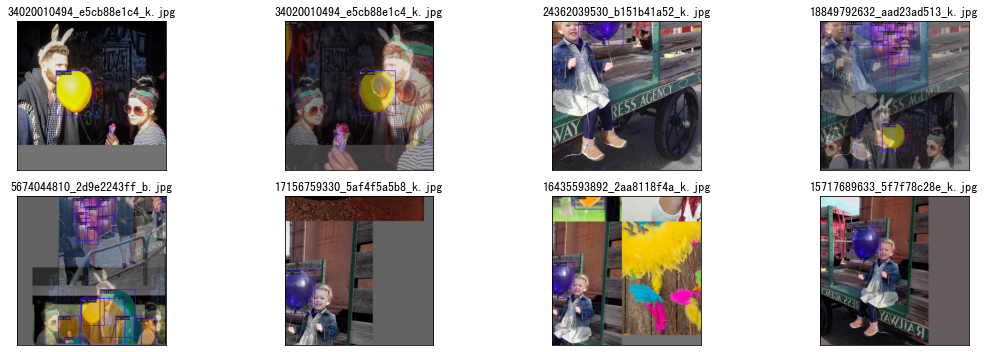

In [4]:
# 训练前可视化验证
from mmdet.registry import DATASETS, VISUALIZERS
from mmengine.config import Config
from mmengine.registry import init_default_scope
import os
import matplotlib.pyplot as plt
import os.path as osp    # 需要添加这句才能运行

cfg = Config.fromfile('data/rtmdet_tiny_1xb12-40e_balloon.py')

init_default_scope(cfg.get('default_scope', 'mmdet'))

dataset = DATASETS.build(cfg.train_dataloader.dataset)
visualizer = VISUALIZERS.build(cfg.visualizer)
visualizer.dataset_meta = dataset.metainfo

plt.figure(figsize=(16, 5))

# 只可视化前 8 张图片
for i in range(8):
   item=dataset[i]

   img = item['inputs'].permute(1, 2, 0).numpy()
   data_sample = item['data_samples'].numpy()
   gt_instances = data_sample.gt_instances
   img_path = osp.basename(item['data_samples'].img_path)

   gt_bboxes = gt_instances.get('bboxes', None)
   gt_instances.bboxes = gt_bboxes.tensor
   data_sample.gt_instances = gt_instances

   visualizer.add_datasample(
            osp.basename(img_path),
            img,
            data_sample,
            draw_pred=False,
            show=False)
   drawed_image=visualizer.get_image()

   plt.subplot(2, 4, i+1)
   plt.imshow(drawed_image[..., [2, 1, 0]])
   plt.title(f"{osp.basename(img_path)}")
   plt.xticks([])
   plt.yticks([])

plt.tight_layout()    

# 训练

In [ ]:
# 模型训练
# python tools/train.py data/rtmdet_tiny_1xb12-40e_balloon.py

# 模型测试

In [5]:
# 模型测试
!python tools/test.py data/rtmdet_tiny_1xb12-40e_balloon.py work_dirs/rtmdet_tiny_1xb12-40e_balloon/best_coco/bbox_mAP_epoch_20.pth --show-dir results

06/11 15:07:36 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.8.10 (default, Jun  4 2021, 15:09:15) [GCC 7.5.0]
    CUDA available: True
    numpy_random_seed: 1779776155
    GPU 0: NVIDIA GeForce RTX 3090
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.1, V11.1.105
    GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
    PyTorch: 1.9.0+cu111
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-genco

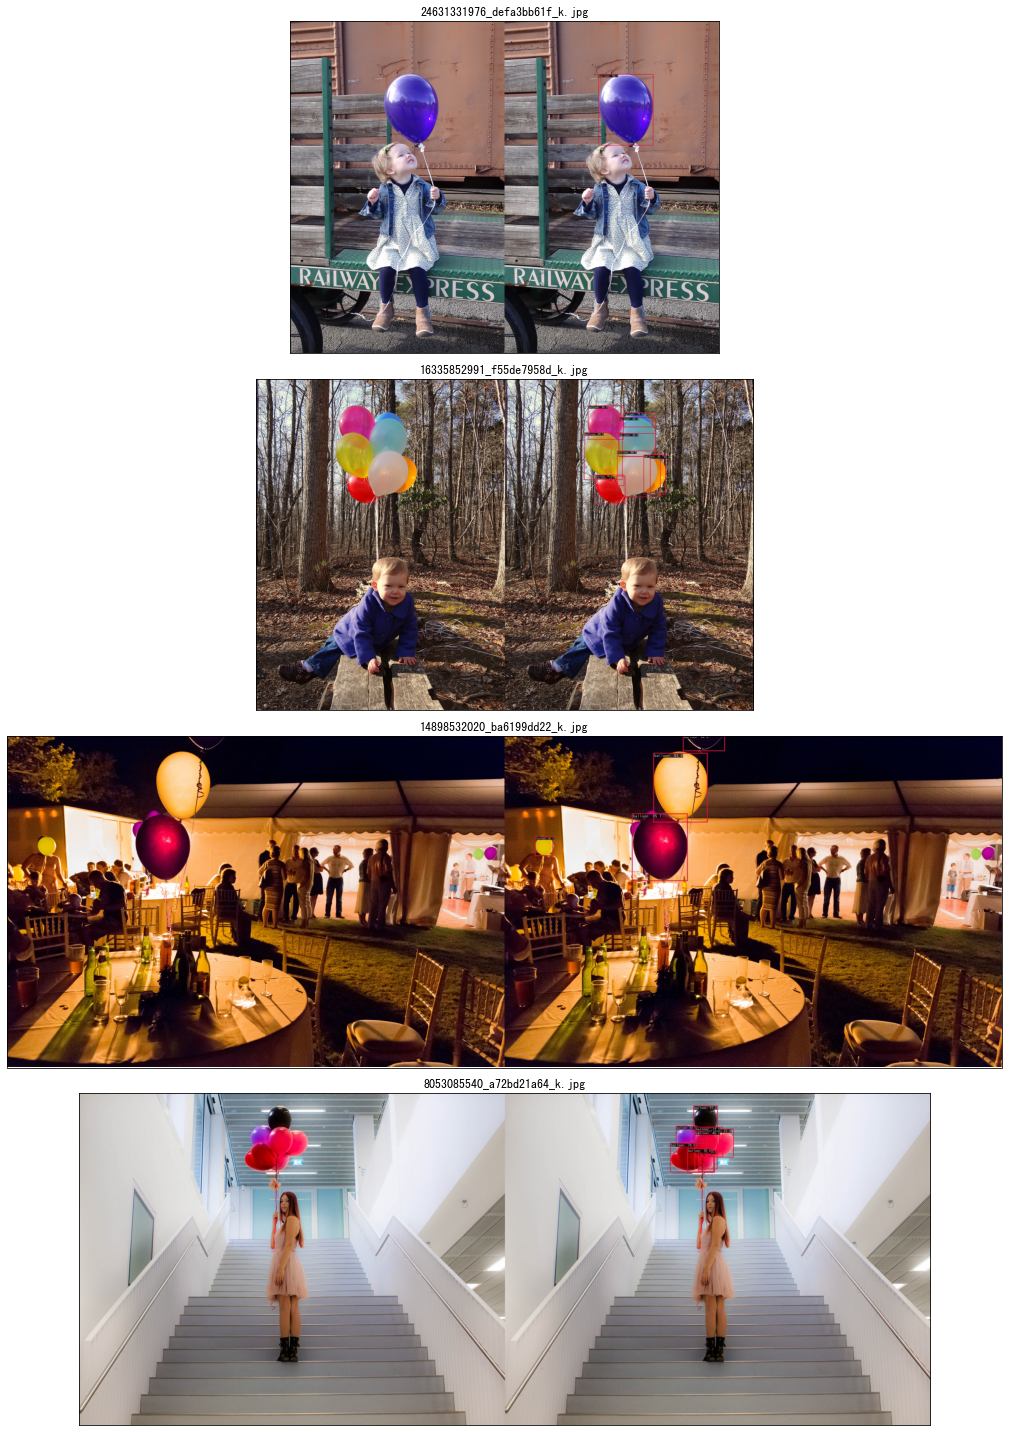

In [9]:
# 测试集可视化

import os
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

plt.figure(figsize=(20, 20))

# 你如果重新跑，这个时间戳是不一样的，需要自己修改
root_path='work_dirs/rtmdet_tiny_1xb12-40e_balloon/20230611_220021/results/'
image_paths= [filename for filename in os.listdir(root_path)][:4]

for i,filename in enumerate(image_paths):
    name = os.path.splitext(filename)[0]

    image = Image.open(root_path+filename).convert("RGB")
  
    plt.subplot(4, 1, i+1)
    plt.imshow(image)
    plt.title(f"{filename}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

In [7]:
# 测试图片
!python demo/image_demo.py data/test_balloon/balloon.jpg data/rtmdet_tiny_1xb12-40e_balloon.py --weights work_dirs/rtmdet_tiny_1xb12-40e_balloon/best_coco/bbox_mAP_epoch_20.pth --out-dir results

Loads checkpoint by local backend from path: work_dirs/rtmdet_tiny_1xb12-40e_balloon/best_coco/bbox_mAP_epoch_20.pth
06/11 19:49:10 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
06/11 19:49:10 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
06/11 19:49:13 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
06/11 19:49:13 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: 1m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   

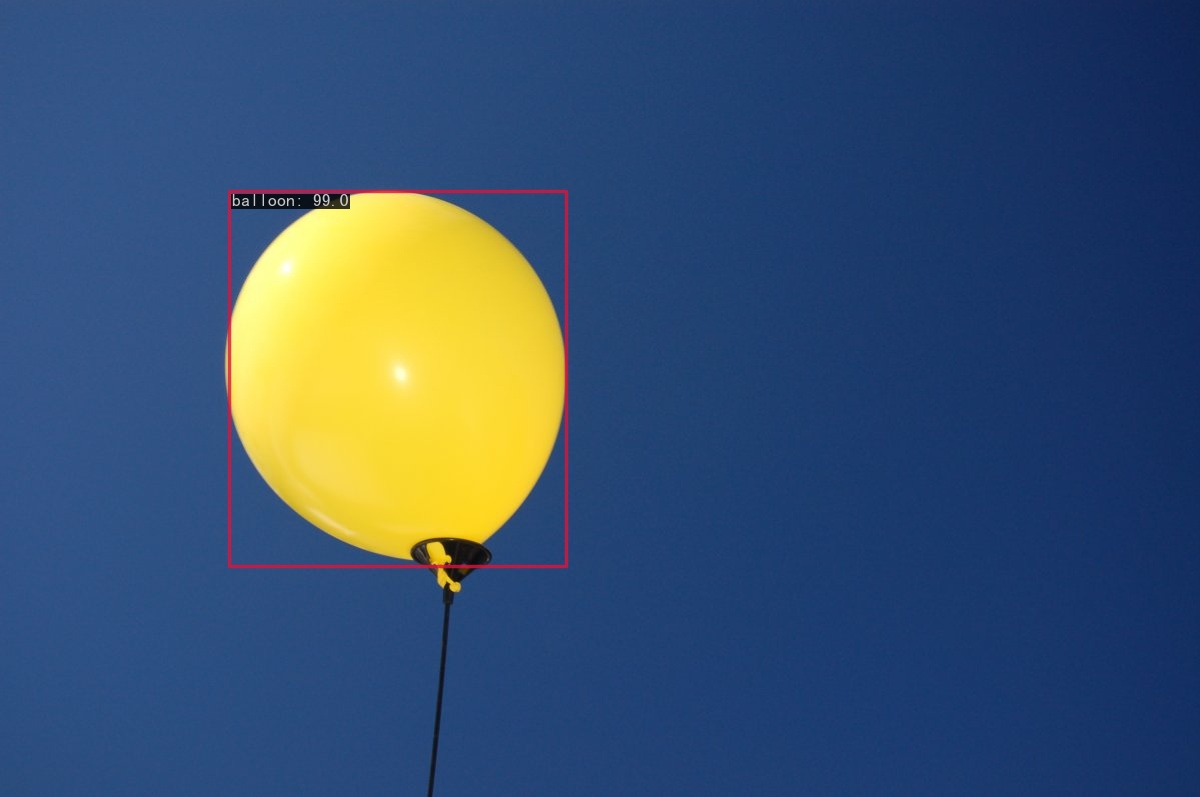

In [10]:
Image.open('results/vis/balloon.jpg')